In [1]:
import pandas as pd
import altair as alt

alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [2]:
# Read dataset
shopify_dataset = pd.read_csv('../data/2022_Summer_DataScience_Intern_Challenge.csv')

In [3]:
shopify_dataset.shape

(5000, 7)

In [4]:
shopify_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


#### No missing values in dataset

In [5]:
shopify_dataset.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


## Problem Statement - 1


Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

- Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
- What metric would you report for this dataset?
- What is its value?

##### Extracting date from timestamp 

In [6]:
# Get order dates from created_at timestamp 
shopify_dataset['order_date'] = pd.to_datetime(shopify_dataset['created_at']).dt.date
shopify_dataset['order_date'] = pd.to_datetime(shopify_dataset['order_date'])
shopify_dataset['order_date'].unique().shape

(30,)

In [7]:
shopify_dataset['shop_id'].unique().shape

(100,)

From the results above, we can confirm what is stated in our problem statement.

The dataset has order details from 100 shopify shops selling one model of shoe over the period of 30 days and the describe output in cmd 5 tells us that the average order value as `$3145.13` which is stated in the problem statement as well.

Let's explore the dataset to see what is wrong.

##### All orders are unique

In [8]:
shopify_dataset['order_id'].unique().shape

(5000,)

All order_id are unique which means there is no problem of multiple entries for same order spotted in the dataset.

In [9]:
# Calculate price per item
shopify_dataset['price_per_item'] = shopify_dataset['order_amount'] / shopify_dataset['total_items']

In [10]:
shopify_dataset['price_per_item'].describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: price_per_item, dtype: float64

##### Observations

Given that all 100 shopify shops sells only model of shoe and the shoe prices is ranging between $\$90$ - $\$169$ as indicated by min, 25%, 50%, 75% percentile values but there are shoe item in the dataset which is sold for around $\$25725$ indicated by max in the output.

The shoe item price of $25725 seems could be a data entry mistake or an actual outlier. Let's plot data to explore this.

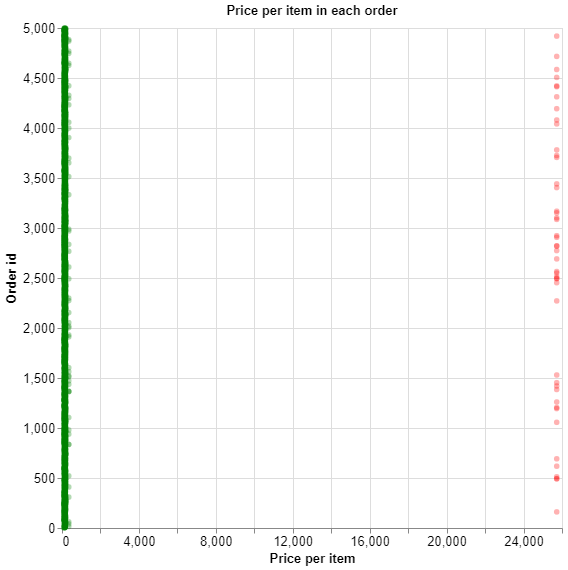

In [11]:
# Plot price_per_item for each order
shopify_item_price_plot = (alt.Chart(shopify_dataset, title='Price per item in each order')
                              .encode(x=alt.X('price_per_item', title='Price per item'),
                                      y=alt.Y('order_id', title='Order id'),
                                      color=alt.condition(alt.datum.price_per_item > 500, alt.value('red'), alt.value('green'))
                                      ).mark_circle(opacity=0.3)
                                       .properties(height=500,
                                                   width=500)
                                       .configure_axis(
                                                    labelFontSize=13,
                                                    titleFontSize=13
                                                )
                           )

shopify_item_price_plot

Interesting to look that there are multiple orders where shoes are bought for price above $\$24,000$ per item. This raises a question that what kind of shoe model is sold which costs above $\$24,000$ and how many customers/users are buying these.

In [12]:
shopify_dataset_outlier_price = shopify_dataset[shopify_dataset['price_per_item'] > 24000].sort_values(['shop_id', 'user_id', 'payment_method'])
shopify_dataset_outlier_price

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_date,price_per_item
2495,2496,78,707,51450,2,cash,2017-03-26 4:38:52,2017-03-26,25725.0
2452,2453,78,709,51450,2,cash,2017-03-27 11:04:04,2017-03-27,25725.0
2922,2923,78,740,25725,1,debit,2017-03-12 20:10:58,2017-03-12,25725.0
3151,3152,78,745,25725,1,credit_card,2017-03-18 13:13:07,2017-03-18,25725.0
4412,4413,78,756,51450,2,debit,2017-03-02 4:13:39,2017-03-02,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,2017-03-18,25725.0
3724,3725,78,766,77175,3,credit_card,2017-03-16 14:13:26,2017-03-16,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,2017-03-27,25725.0
4192,4193,78,787,77175,3,credit_card,2017-03-18 9:25:32,2017-03-18,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,2017-03-15,25725.0


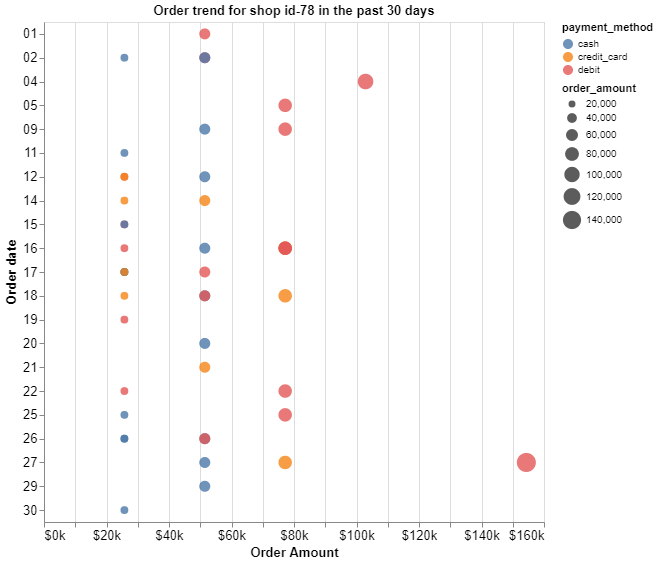

In [13]:
# Plot order trends from above data over 30 days
shopify_orders_by_date_plot = (alt.Chart(shopify_dataset_outlier_price, title='Order trend for shop id-78 in the past 30 days')
                                  .encode(
                                          x=alt.X('order_amount', title='Order Amount',
                                                  axis=alt.Axis(format='$~s')),
                                          y=alt.Y('date(order_date):O',
                                                   title='Order date'),
                                          color=alt.Color('payment_method:O', scale=alt.Scale(scheme='tableau10')),
                                          size='order_amount'
                                          ).mark_circle(opacity=0.8)
                                           .properties(height=500,
                                                       width=500)
                                           .configure_axis(
                                                        labelFontSize=13,
                                                        titleFontSize=13
                                                    )
                           )

shopify_orders_by_date_plot

It can be observed from the above plot that the trend had been almost consistent for this shop over the 30 day window and have usually sold multiple items in a single day. It can be also be seen that higher amounts are usually paid by debit and credit card. 

**Observations - 2**

From above output, it can be also observed that only 1 shop (**Shop Id - 78**) is selling shoe model of worth around $\$25725$ per item which sounds abberant.

As order amount from Shop Id 78 seems divergent from the regular trend, Shopify should look further look for this outlier. There are multiple scenarios that come to my mind in this situation which could be explored.

- The Shop Id 78 might be selling high end luxorious shoe model or limited edition models of high end brands.
- There could be possibility that Shop Id 78 is selling in different currency than dollars
- There might be case that if shop is wrongly listed as shoe seller and could be selling something like jewellery, electronics etc.
- Because order amount is also paid by cash in many orders, the possibility of data entry mistake in price / fraud transactions slightly decreases. 

For shopify to maintain the integrity of the platform and prevent any fraud transactions / theft from customers:

- The shop owner background should be checked. 
- There should be some separate quality check for the item being listed with high price if they are real and worth the price so customers can trust the platform and don't get misleaded by fake items.
- A background check on users can also be done if they the users are frequent buyers and their purchase history that if they have bought luxury items in the past.

##### _Another interesting plot is between order id and order amount_

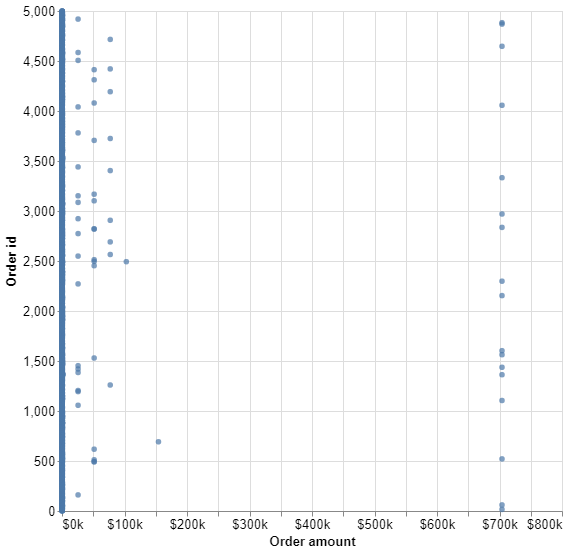

In [14]:
shopify_order_plot = (alt.Chart(shopify_dataset)
                         .encode(x=alt.X('order_amount', title='Order amount', axis=alt.Axis(format='$~s')),
                                 y=alt.Y('order_id', title='Order id')
                                 ).mark_circle().properties(height=500,
                                                            width=500)
                                  .configure_axis(
                                                labelFontSize=13,
                                                titleFontSize=13
                                                 )
                     )

shopify_order_plot

In [15]:
shopify_dataset_outliers_2 = shopify_dataset[shopify_dataset['order_amount'] > 70000].sort_values(by=['shop_id', 'user_id', 'order_date'])
shopify_dataset_outliers_2

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_date,price_per_item
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,2017-03-02,352.0
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00,2017-03-02,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,2017-03-04,352.0
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,2017-03-07,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,2017-03-07,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,2017-03-11,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,2017-03-12,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,2017-03-15,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,2017-03-17,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,2017-03-19,352.0


As already observed for Shop Id 78 has high price selling item and hence it contributes to high overall order in transactions.

Looking into the Shop 42, there are few observations here:
- Only one customer (user_id 607) has been purchasing items from Shop 42
- The total no. of items for each order is same i.e. each order has 2000 items worth $\$70400$
- All order transactions have timestamp '2017-03-dd 4:00:00' which indicates the possibility that orders are automated at this time and are paid through credit card 

This type of transactions from Shop 42 also raises some suspicison as many times multiple transactions have happened at same timestamp with different order ids. 

**Both orders from Shop 42 and 78 raises questions and in ideal case should go through background checks to prevent Shopify customers and sellers from frauds.**

## A better way to evaluate the average order value (AOV)

Calculate average without these outlier order amount as mean is highly impacted by large values.

The average order value (AOV) without oultiers can be calculated by excluding below identified outliers:
- price_per_item > 24000
- total order amount > 70000

In [16]:
# Exclude both type of outliers using filter conditions
shopify_dataset_exclude_outliers = shopify_dataset[(shopify_dataset['order_amount'] < 70000) & (shopify_dataset['price_per_item'] < 24000)]
shopify_dataset_exclude_outliers['order_amount'].describe()

count    4937.000000
mean      302.580514
std       160.804912
min        90.000000
25%       163.000000
50%       284.000000
75%       387.000000
max      1760.000000
Name: order_amount, dtype: float64

#### The average order value (AOV) after excluding outlier transactions is $302

## Another Metric to consider

I would like to report **median order value (MOV)** for this dataset as median are not impacted by outliers (magnitude of outliers) , so in presence of these outlier transactions which are not known as either fraud or not fraud so I would like to have median order value instead of excluding those transactions.


The median order value (MOV) can be taken from the describe output of dataset. The below 50% percentile represents median of column order_amount and hence is our MOV.


In [17]:
shopify_dataset['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

#### The median order value (MOV) after excluding outlier transactions is $284